In [1]:
import pandas as pd  # Veri işleme için
import numpy as np  # Sayısal işlemler için
import matplotlib.pyplot as plt  # Görselleştirme için
from sklearn.cluster import KMeans  # K-Means algoritması için
from sklearn.preprocessing import StandardScaler  # Veriyi ölçeklendirmek için
import seaborn as sns #Görselleştirme için ek

In [2]:
#Veri Setinii Yükleme
data=pd.read_csv('Mall_Customers.csv')

In [3]:
#Kullanılacak Özellikler
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

#Yıllık gelir ve harcama skorunu kümeleme ile analiz edeceğiz

In [5]:
#Veriyi Ölçeklendirme
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
#Dirsek Metodu İle Uygun Küme Bulma
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'WCSS')

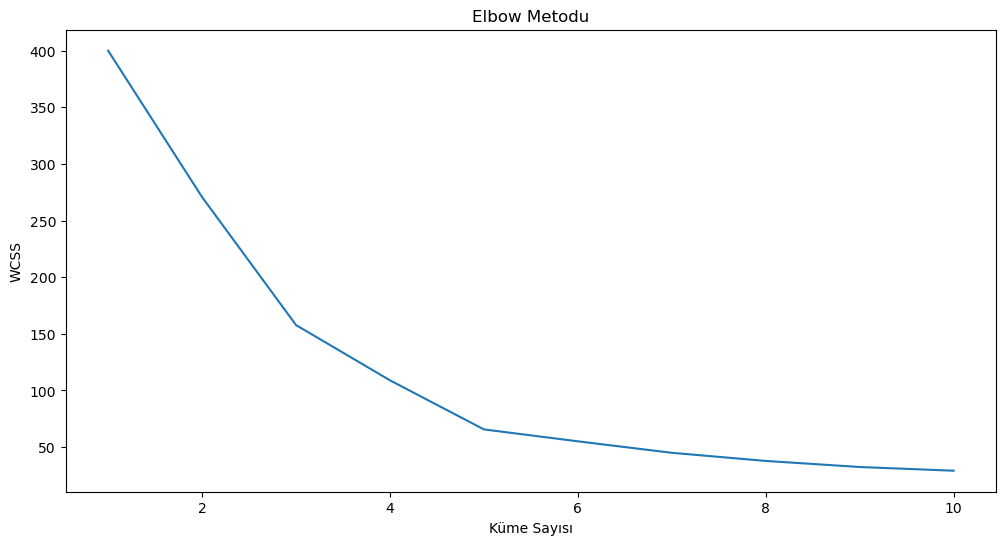

In [11]:
#Elbow Grafiğini Çizme
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Metodu')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')

In [12]:
#Kmeans modelini oluşturma ve eğitme
kmeans=KMeans(n_clusters=5,random_state=42)
clusters=kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
#Kümeleri etiketleme
data['Cluster']=clusters

Text(0.5, 1.0, 'Müşteri Segmentasyonu')

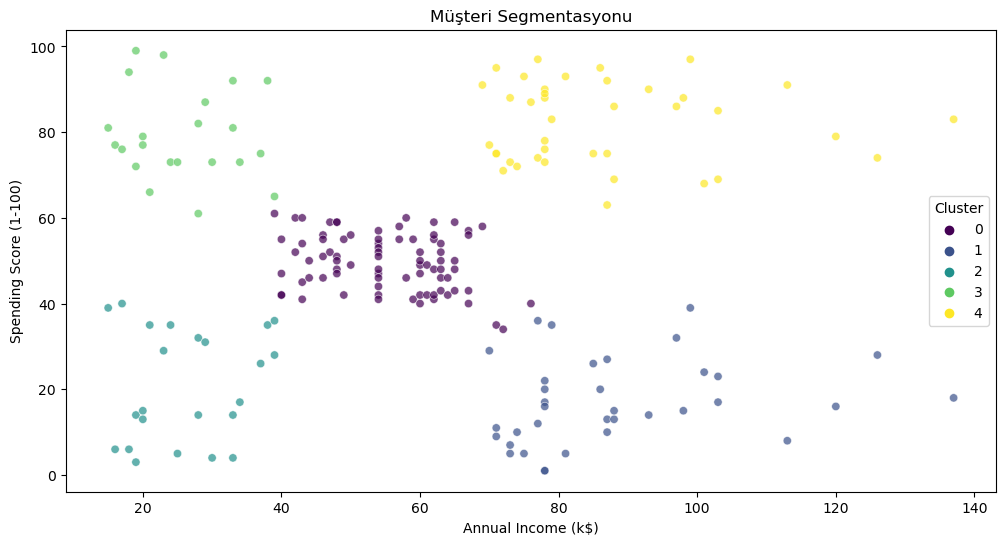

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Müşteri Segmentasyonu')
